# Assignmen 4 vj222hx

## Conceptual
1. LDA assumes that all classes share the same covariance matrix, but we cannot assume this for QDA meaning we need k covariance matrices for k classes.
   
   The decision boundary for LDA is linear and it is quadratic for QDA as per their names. 

   LDA generally reqires fewer samples than QDA because it is fewer parameters to estimate. 

   Since QDA has more parameters it can be more accurate but it also has a higher possibility to be overfitted. 

2. a) There are different distance metrics that can be used such as Euclidean distance and Manhattan distance. If the predictors have different scales, the data can be normalized to bring them onto a similar scale. 

b) Curse of dimentionality referes to the issue with distance based algorithms that the datapoints get sparser the more dimentions are added which can make the alorithm less accurate. 

## Practical
Add imports


In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN

Load Smarket dataset

In [378]:
csvFile = pd.read_csv("Smarket.csv", index_col=0)

Display the number of features and their names:

In [379]:
colNames = csvFile.columns.tolist()
print(f"Number of columns: {len(colNames)}")
print(f"Column Names: {colNames}")

Number of columns: 9
Column Names: ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']


Print a statistic summary of the predictors and the response:

In [380]:
print(csvFile.describe())
print(csvFile['Direction'].value_counts())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0

Display the number of datapoints

In [381]:
print(f"Number of datapoints {len(csvFile)}")

Number of datapoints 1250


Display the data in a table

In [382]:
print(csvFile.head(20))

    Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
1   2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2   2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3   2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
4   2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
5   2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up
6   2001  0.213  0.614 -0.623  1.032  0.959  1.3491  1.392        Up
7   2001  1.392  0.213  0.614 -0.623  1.032  1.4450 -0.403      Down
8   2001 -0.403  1.392  0.213  0.614 -0.623  1.4078  0.027        Up
9   2001  0.027 -0.403  1.392  0.213  0.614  1.1640  1.303        Up
10  2001  1.303  0.027 -0.403  1.392  0.213  1.2326  0.287        Up
11  2001  0.287  1.303  0.027 -0.403  1.392  1.3090 -0.498      Down
12  2001 -0.498  0.287  1.303  0.027 -0.403  1.2580 -0.189      Down
13  2001 -0.189 -0.498  0.287  1.303  0.027  1.0980  0.680        Up
14  2001  0.680 -0.189 -0.498  0.2

Correlation Plot

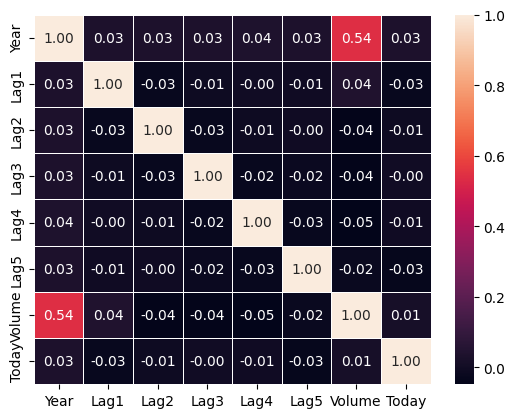

In [383]:
sns.heatmap(csvFile.drop(columns=['Direction']).corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

Here we can see that most values have very little to no correlation except for year and volume which have a correlation of 0.54. This means that an increase in year number correlates with an increase in volume. 

<Axes: xlabel='Year', ylabel='Volume'>

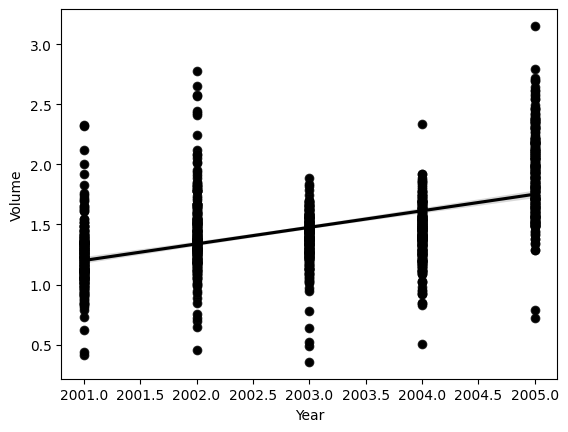

In [384]:
sns.scatterplot(data=csvFile, x='Year', y='Volume', color="black")
sns.regplot(data=csvFile, x="Year", y="Volume", color="black")

This graph reinforces what we saw in the previous heatmap that an increase in year has a positive coorelation with Volume

Logistics regression

In [385]:
X = csvFile[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)
y = csvFile['Direction'].map({'Up': 1, 'Down': 0})
model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                0.002074
Time:                        15:27:25   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

The p values for the coefficients are all > 0.05 which means they are not significant enough for predicting the direction

Predict using the model

In [386]:
probs = model.predict()

for i in range(10):
    print(f"{i + 1}   {probs[i]}")

1   0.5070841334630001
2   0.48146787817516973
3   0.4811388348131379
4   0.5152223557927659
5   0.5107811625911515
6   0.5069564604552573
7   0.49265087386752915
8   0.5092291581449722
9   0.5176135261687921
10   0.4888377794207711


This shows the probability that the value market will go up rather than down as that is what we defined with csvFile['Direction'].map({'Up': 1, 'Down': 0})

Confusion matrix

In [387]:
pred = []
for i in probs:
    if i > 0.5:
        pred.append("Up")
    else:
        pred.append("Down")

print(pd.crosstab(pred, csvFile["Direction"]))
accuracy = np.mean(pred == csvFile["Direction"])
print(f"Model Accuracy: {accuracy}")

Direction  Down   Up
row_0               
Down        145  141
Up          457  507
Model Accuracy: 0.5216


When we printed 10 values we can see that all values are close to 0.5 which indicates that it it not a confident prediction. This is reinforced with a model accuracy of 52.16% which is slightly better than a coin toss. 

In [388]:
X = csvFile[['Lag1', 'Lag2']]
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
probs = model.predict(X)

pred = []
for i in probs:
    if i > 0.5:
        pred.append("Up")
    else:
        pred.append("Down")

print(pd.crosstab(pred, csvFile["Direction"]))
accuracy = np.mean(pred == csvFile['Direction'])
print(f"Model Accuracy: {accuracy}")

Optimization terminated successfully.
         Current function value: 0.691361
         Iterations 4
Direction  Down   Up
row_0               
Down        114  102
Up          488  546
Model Accuracy: 0.528


This shows that only using Lag1 and Lag2 gives a slightly better accuracy than having all the predictors, however we do not know if this is significant. 

Prior probabilities of groups: [0.4816 0.5184]
Group means:
[[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]
Coefficients of linear discriminants: [[-0.07126095 -0.04433204]]


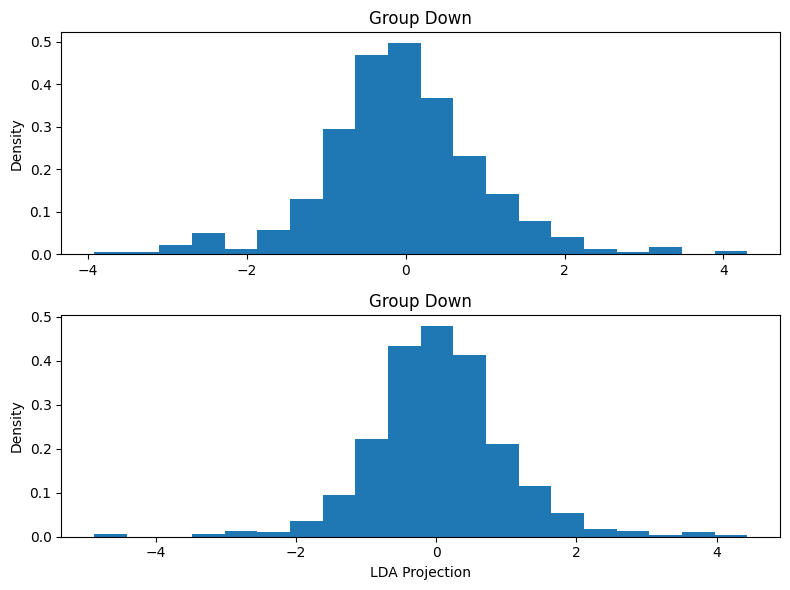

In [389]:
X = csvFile[['Lag1', 'Lag2']]
model = LDA()
model.fit(X, y)
print(f"Prior probabilities of groups: {model.priors_}")
print(f"Group means:\n{model.means_}")
print(f"Coefficients of linear discriminants: {model.coef_}")

transform = model.transform(X)
lda_df = pd.DataFrame({'LDA1': transform[:, 0], 'Direction': y})

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

subset = lda_df[lda_df['Direction'] == 0]
axes[0].hist(subset['LDA1'], bins=20, density=True)
axes[0].set_ylabel("Density")
axes[0].set_title(f"Group Down")

subset = lda_df[lda_df['Direction'] == 1]
axes[1].hist(subset['LDA1'], bins=20, density=True)
axes[1].set_ylabel("Density")
axes[1].set_title(f"Group Down")

plt.xlabel("LDA Projection")
plt.tight_layout()
plt.show()

From the first print we can see that there is 51.84% up in the data and the rest is down. From the second print we can see that the average value for Lag1 when the direction is down is 0.05, the average value for Lag2 when the direction is down is 0.03. Lag1 and Up is -0.04 and Lag2 and Up is -0.02. The last print shows that an increase in Lag1 or Lag2 will generally trend towards a down direction because the coefficients are negative. The graphs show that there is some overlap meaning that it might not be a good predictor of direction.

In [390]:
lda_class = model.predict(X)
conf_matrix = pd.crosstab(lda_class, y)
accuracy = accuracy_score(y, lda_class)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 Direction    0    1
row_0              
0          114  102
1          488  546
Accuracy: 0.528


Here we get the same result as when we used logistics regression which means LDA does not contrinbute any more than logistics regression

QDA

In [391]:
model = QDA()
model.fit(X, y)
print(f"Prior probabilities of groups: {model.priors_}")
print(f"Group means:\n{model.means_}")

Prior probabilities of groups: [0.4816 0.5184]
Group means:
[[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]


These numbers are the same as with LDA which is excpected since we are using the same data

Predict using QDA

In [ ]:
qda_class = model.predict(X)

conf_matrix = pd.crosstab(qda_class, y, rownames=['Predicted'], colnames=['Actual'])

accuracy = accuracy_score(y, qda_class)

# Print results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 Actual       0    1
Predicted          
0          109   94
1          493  554

Accuracy: 0.5304


Here we got a slightly better accuracy than with LDA which is expected since it has more parameters to utilize, however it also has a higher risk of overfitting

Use KNN clustering

In [393]:
train = csvFile['Year'] < 2005
print(csvFile[~train].shape)

(252, 9)


In [394]:
train_X = csvFile[['Lag1', 'Lag2']][train]
test_X = csvFile[['Lag1', 'Lag2']][~train]

train_direction = csvFile['Direction'][train]
test_direction = csvFile['Direction'][~train]

knn_model = KNN(n_neighbors=1)
knn_model.fit(train_X, train_direction)

knn_pred = knn_model.predict(test_X)

conf_matrix = pd.crosstab(knn_pred, test_direction, rownames=['Predicted'], colnames=['Actual'])

accuracy = accuracy_score(test_direction, knn_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 Actual     Down  Up
Predicted          
Down         43  58
Up           68  83
Accuracy: 0.5


In [395]:
knn_model = KNN(n_neighbors=3)
knn_model.fit(train_X, train_direction)

knn_pred = knn_model.predict(test_X)

conf_matrix = pd.crosstab(knn_pred, test_direction, rownames=['Predicted'], colnames=['Actual'])

accuracy = accuracy_score(test_direction, knn_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 Actual     Down  Up
Predicted          
Down         48  55
Up           63  86
Accuracy: 0.5317460317460317


When K=1 we get an accuracy of 0.5 is worse than before, however when putting k=3 we get a better accuracy than before, however we dont know if it is significant or not. 